<a href="https://colab.research.google.com/github/tekayounes/PythonDataScienceHandbook/blob/master/covid_19_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://cb.lk/covid_19

--2021-01-13 22:04:30--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-01-13 22:04:30--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-01-13 22:04:31--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-01-13 22:04:32--  https://www.dropbox.com/s/raw/7

In [2]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [3]:
import keras 

from keras.models import *
from keras.layers import *
from keras.preprocessing import image 
import PIL

In [4]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding="SAME", activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64, (3,3), padding="SAME", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2)) 

model.add(Conv2D(128, (3,3), padding="SAME", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#model.add(Conv2D(256, (3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

#model.add(Dense(2, activation='softmax'))
#keras.losses.categorical_crossentropy
#keras.losses.binary_crossentropy
model.compile(loss=keras.losses.binary_crossentropy, optimizer="adam", metrics=['accuracy'])


In [5]:
from keras.preprocessing.image import ImageDataGenerator
import os
main_dir = "/content/CovidDataset" #/content/CovidDataset
train_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_data = ImageDataGenerator(rescale=1./255)

train_dir = os.path.join(main_dir, "Train")

training_set = train_data.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_dir = os.path.join(main_dir, "Val")
test_set = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'

)





Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [6]:
results=model.fit_generator(
    training_set,
    steps_per_epoch=2,
    epochs=50,
    validation_data=test_set,
    validation_steps=2
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 7s 4s/step - loss: 1.4493 - accuracy: 0.4792 - val_loss: 1.0293 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 4s 3s/step - loss: 2.2870 - accuracy: 0.4792 - val_loss: 0.6831 - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 4s 3s/step - loss: 0.6997 - accuracy: 0.5417 - val_loss: 0.6875 - val_accuracy: 0.5833
Epoch 4/50
2/2 [==============================] - 4s 3s/step - loss: 0.6915 - accuracy: 0.5625 - val_loss: 0.6874 - val_accuracy: 0.9500
Epoch 5/50
2/2 [==============================] - 4s 3s/step - loss: 0.6689 - accuracy: 0.6250 - val_loss: 0.6800 - val_accuracy: 0.8833
Epoch 6/50
2/2 [==============================] - 4s 3s/step - loss: 0.6657 - accuracy: 0.6875 - val_loss: 0.6682 - val_accuracy: 0.5500
Epoch 7/50
2/2 [==============================] - 4s 3s/step - loss: 0.5882 - accuracy: 0.7708 - val_loss: 0.6042 - val_accuracy: 0.9167
Epoch 8/50
2/2 [=========================

In [7]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

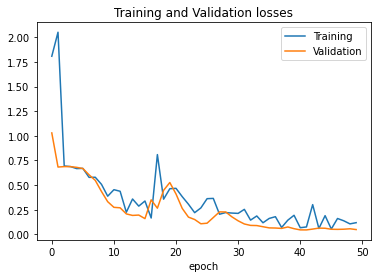

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

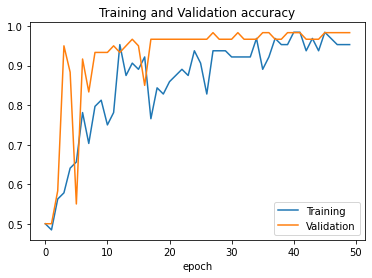

In [9]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [10]:
test_loss, test_acc = model.evaluate(test_set)
print('test loss :{}   test accuracy :{}'.format(test_loss,test_acc))

2/2 [==============================] - 2s 791ms/step - loss: 0.0486 - accuracy: 0.9833
test loss :0.04862981662154198   test accuracy :0.9833333492279053
